In [183]:
import numpy as np

In [184]:
p = 2+2+0+4+6+2

$ \huge{2.}$

In [185]:
a = p

In [186]:
n = 4

In [187]:
def valid_per(elt):
  sum=0
  for i in range(len(elt)):
    sum+=(i+1)*elt[i]
  return sum > a

In [188]:
def generate_permutations(nums):
    if len(nums) == 1: #Base case
        return [nums]

    perms = [] #Recursive Case
    for i in range(len(nums)):
        nums[0], nums[i] = nums[i], nums[0]

        sub_perms = generate_permutations(nums[1:])

        
        for perm in sub_perms:
            perms.append([nums[0]] + perm)

        
        nums[0], nums[i] = nums[i], nums[0]

    return perms

In [189]:
perms = generate_permutations(elt)
perms

[[2, 3, 4, 1],
 [2, 3, 1, 4],
 [2, 4, 3, 1],
 [2, 4, 1, 3],
 [2, 1, 4, 3],
 [2, 1, 3, 4],
 [3, 2, 4, 1],
 [3, 2, 1, 4],
 [3, 4, 2, 1],
 [3, 4, 1, 2],
 [3, 1, 4, 2],
 [3, 1, 2, 4],
 [4, 3, 2, 1],
 [4, 3, 1, 2],
 [4, 2, 3, 1],
 [4, 2, 1, 3],
 [4, 1, 2, 3],
 [4, 1, 3, 2],
 [1, 3, 4, 2],
 [1, 3, 2, 4],
 [1, 4, 3, 2],
 [1, 4, 2, 3],
 [1, 2, 4, 3],
 [1, 2, 3, 4]]

In [190]:
valid_perms=[]
for perm in perms:
  val=valid_per(perm)
  if val == 1:
    valid_perms.append(perm)
    

In [191]:
import random

In [192]:
def Unif_Rand_Pert(n, a, N):
  pert = []
  for i in range(N):
    Permutation = random.choice(valid_perms)
    pert.append(Permutation)
  pert, count = np.unique(pert, axis=0, return_counts=True)
  return pert, count

In [193]:
n = 4
N=1000*p
result= Unif_Rand_Pert(n, a, N)
print(f"Permutations -> Frequencies")
for i in range(len(result[0])):
  print(f"{tuple(result[0][i])} -> {result[1][i]}")

Permutations -> Frequencies
(1, 2, 3, 4) -> 618
(1, 2, 4, 3) -> 696
(1, 3, 2, 4) -> 699
(1, 3, 4, 2) -> 702
(1, 4, 2, 3) -> 647
(1, 4, 3, 2) -> 642
(2, 1, 3, 4) -> 700
(2, 1, 4, 3) -> 680
(2, 3, 1, 4) -> 662
(2, 3, 4, 1) -> 680
(2, 4, 1, 3) -> 648
(2, 4, 3, 1) -> 700
(3, 1, 2, 4) -> 619
(3, 1, 4, 2) -> 671
(3, 2, 1, 4) -> 649
(3, 2, 4, 1) -> 705
(3, 4, 1, 2) -> 691
(3, 4, 2, 1) -> 685
(4, 1, 2, 3) -> 652
(4, 1, 3, 2) -> 660
(4, 2, 1, 3) -> 628
(4, 2, 3, 1) -> 656
(4, 3, 1, 2) -> 671
(4, 3, 2, 1) -> 639


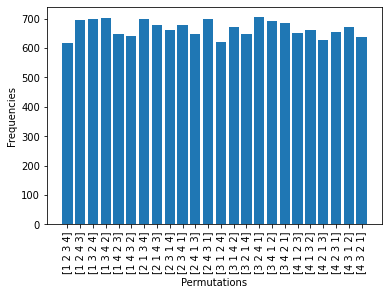

In [194]:
plt.bar(list(range(len(result[0]))),result[1])
plt.xticks(range(len(result[0])), [str(p) for p in result[0]], rotation=90)
plt.xlabel("Permutations")
plt.ylabel("Frequencies");

In [195]:
def feasible_neighbour(perm):
  n=[]
  for i in range(len(perm)):
    for j in range(i, len(perm)):
      permc=perm.copy()
      permc[i], permc[j] = permc[j], permc[i]
      n.append(permc)
      
  
  res = []
  [res.append(x) for x in n if x not in res]
  return res[1:]

In [196]:
feasible_neighbour([1,2,4,3])

[[2, 1, 4, 3],
 [4, 2, 1, 3],
 [3, 2, 4, 1],
 [1, 4, 2, 3],
 [1, 3, 4, 2],
 [1, 2, 3, 4]]

In [197]:
for perm in valid_perms:
  neigh=feasible_neighbour(perm).copy()
  valid_n=[]
  for elt in neigh:
    val=valid_per(elt)
    if val == 1:
      valid_n.append(elt)
  print('For',perm)
  print('Valid neighbours',valid_n)
  print('Next state is',random.choice(valid_n))
  print('Probability =',1/len(valid_n))
  print('\n##########\n')

For [2, 3, 4, 1]
Valid neighbours [[3, 2, 4, 1], [4, 3, 2, 1], [1, 3, 4, 2], [2, 4, 3, 1], [2, 1, 4, 3], [2, 3, 1, 4]]
Next state is [2, 4, 3, 1]
Probability = 0.16666666666666666

##########

For [2, 3, 1, 4]
Valid neighbours [[3, 2, 1, 4], [1, 3, 2, 4], [4, 3, 1, 2], [2, 1, 3, 4], [2, 4, 1, 3], [2, 3, 4, 1]]
Next state is [3, 2, 1, 4]
Probability = 0.16666666666666666

##########

For [2, 4, 3, 1]
Valid neighbours [[4, 2, 3, 1], [3, 4, 2, 1], [1, 4, 3, 2], [2, 3, 4, 1], [2, 1, 3, 4], [2, 4, 1, 3]]
Next state is [3, 4, 2, 1]
Probability = 0.16666666666666666

##########

For [2, 4, 1, 3]
Valid neighbours [[4, 2, 1, 3], [1, 4, 2, 3], [3, 4, 1, 2], [2, 1, 4, 3], [2, 3, 1, 4], [2, 4, 3, 1]]
Next state is [2, 4, 3, 1]
Probability = 0.16666666666666666

##########

For [2, 1, 4, 3]
Valid neighbours [[1, 2, 4, 3], [4, 1, 2, 3], [3, 1, 4, 2], [2, 4, 1, 3], [2, 3, 4, 1], [2, 1, 3, 4]]
Next state is [2, 1, 3, 4]
Probability = 0.16666666666666666

##########

For [2, 1, 3, 4]
Valid neighbours [

$ \huge{3.}$ \
\
The code is implemented below:

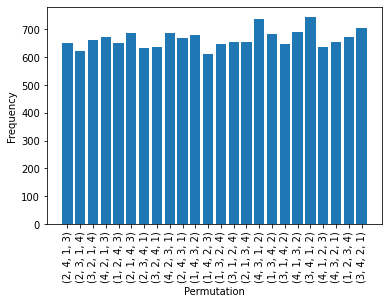

In [198]:
def neighbor(p):
    i, j = random.sample(range(len(p)), 2)
    q = p.copy()
    q[i], q[j] = q[j], q[i]
    return q


def MCMC(n, a, n_iters):
    
    while True:
        p = random.sample(range(1, n+1), n)
        if valid_per(p):
            break
    freq = {tuple(p): 1}
    for _ in range(n_iters):
        # Generate a random neighbor of the current permutation
        q = neighbor(p)
        # If the neighbor is feasible, accept it with uniform probability
        if valid_per(q):
            p = q
            freq[tuple(p)] = freq.get(tuple(p), 0) + 1
        
    return freq


freq = MCMC(4, 16, 16000)


import matplotlib.pyplot as plt
plt.bar(range(len(freq)), freq.values())
plt.xticks(range(len(freq)), [str(p) for p in freq.keys()], rotation=90)
plt.xlabel('Permutation')
plt.ylabel('Frequency')
plt.show()


$ \huge{5.}$ \
\
The code is implemented below:

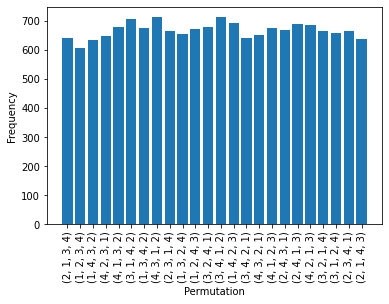

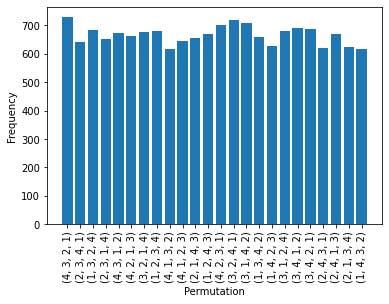

In [199]:
n_vals = [4]
a_vals = [8, 16]
for n in n_vals:
  for a in a_vals:
    freq = MCMC(n, a, 16000)
    plt.bar(range(len(freq)), freq.values())
    plt.xticks(range(len(freq)), [str(p) for p in freq.keys()], rotation=90)
    plt.xlabel('Permutation')
    plt.ylabel('Frequency')
    plt.show()